In [ ]:
import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
import pickle
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import socket, struct
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [10]:
classes = ['afreecatv', 'battleground', 'geforce', 'googlemeet', 'ktgamebox', 'msteams',
 'navernow', 'netflix', 'roblox', 'teamtactics', 'youtube', 'youtubelive',
 'zepeto', 'zoom']

from tqdm import tqdm

data_set = pd.DataFrame()
for cls in classes:
   data_set = pd.concat([data_set,pd.read_csv('Pre-Processed_DataSet/'+cls+'.csv', encoding='unicode_escape')], ignore_index=True)


NameError: name 'step_size' is not defined

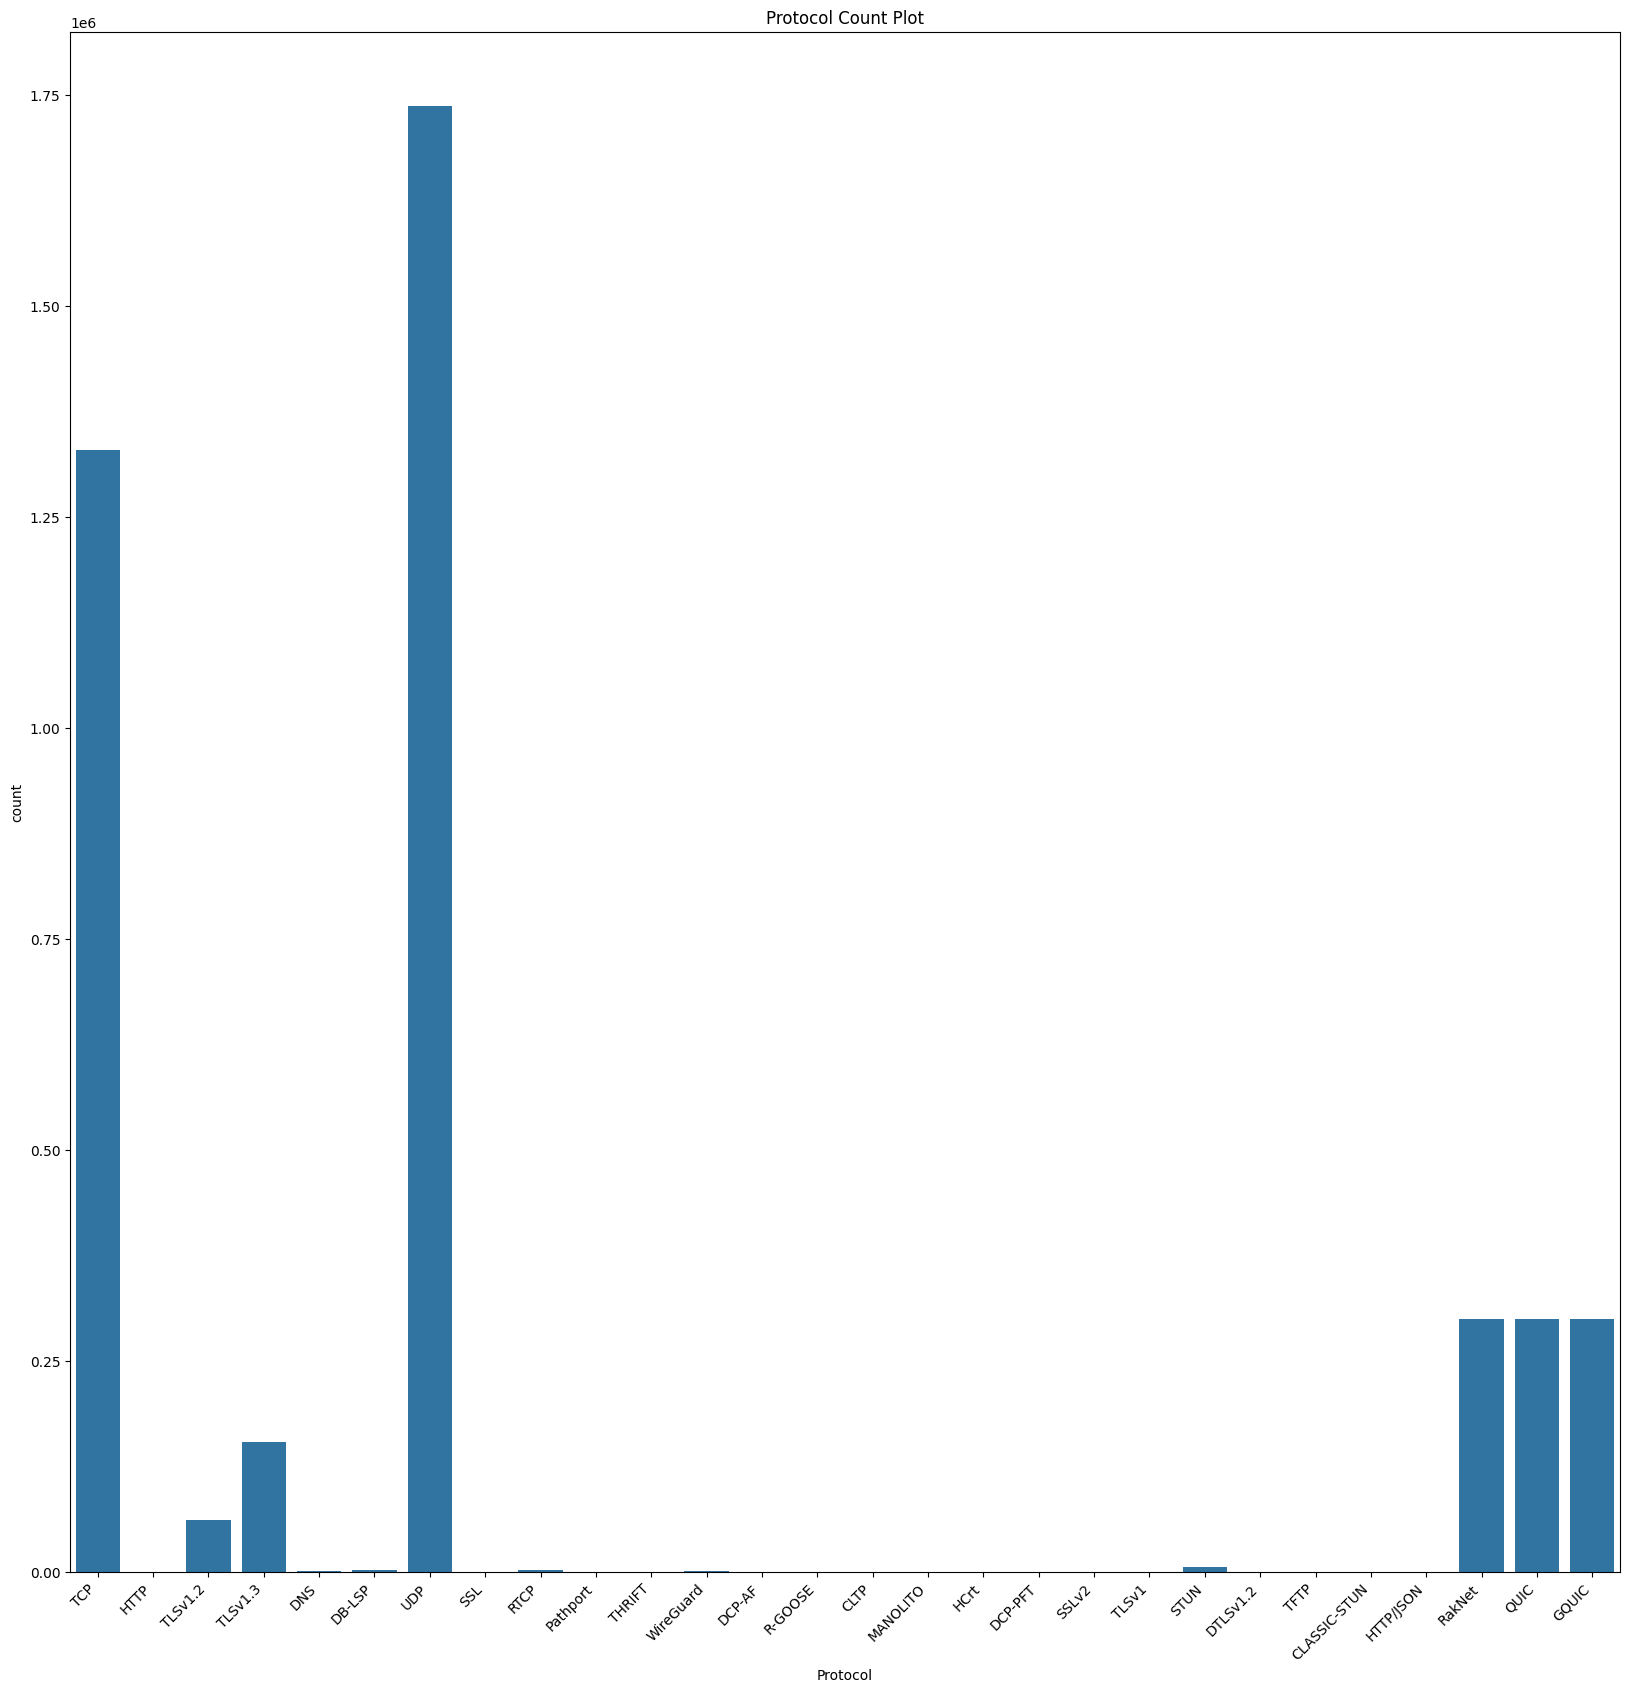

In [18]:
plt.figure(figsize=(20,20))
sns.countplot(x='Protocol', data = data_set)
plt.title('Protocol Count Plot')
plt.xticks(rotation=45, ha='right') 
y_max = data_set['Protocol'].value_counts()
plt.yticks(np.arange(0, y_max + step_size, step_size))
plt.show()

In [9]:
data_set.T

0        \
No.                                                                    1   
Time                                          2022-06-01 11:32:29.301134   
Source                                                      10.215.173.1   
Destination                                                 218.38.31.68   
Length                                                                60   
Info                   57192  >  3456 [SYN] Seq=0 Win=65535 Len=0 MSS...   
group_num                                                              1   
Class                                                          afreecatv   
sport                                                              57192   
dport                                                               3456   
payload_len                                                            0   
Protocol_CLASSIC-STUN                                              False   
Protocol_CLTP                                                      False   
Protocol_DB-LSP                                                    False   
Protocol_DCP-AF                                                    False   
Protocol_DCP-PFT                                                   False   
Protocol_DNS                                                       False   
Protocol_DTLSv1.2                                                  False   
Protocol_GQUIC                                                     False   
Protocol_HCrt                                                      False   
Protocol_HTTP                                                      False   
Protocol_HTTP/JSON                                                 False   
Protocol_MANOLITO                                                  False   
Protocol_Pathport                                                  False   
Protocol_QUIC                                                      False   
Protocol_R-GOOSE                                                   False   
Protocol_RTCP                                                      False   
Protocol_RakNet                                                    False   
Protocol_SSL                                                       False   
Protocol_SSLv2                                                     False   
Protocol_STUN                                                      False   
Protocol_TCP                                                        True   
Protocol_TFTP                                                      False   
Protocol_THRIFT                                                    False   
Protocol_TLSv1                                                     False   
Protocol_TLSv1.2                                                   False   
Protocol_TLSv1.3                                                   False   
Protocol_UDP                                                       False   
Protocol_WireGuard                                                 False   

                                                                 1        \
No.                                                                    2   
Time                                          2022-06-01 11:32:29.327373   
Source                                                      218.38.31.68   
Destination                                                 10.215.173.1   
Length                                                                48   
Info                   3456  >  57192 [SYN, ACK] Seq=0 Ack=1 Win=1638...   
group_num                                                              1   
Class                                                          afreecatv   
sport                                                               3456   
dport                                                              57192   
payload_len                                                            0   
Protocol_CLASSIC-STUN                                              False   
Protocol_CLTP                       

In [ ]:
sns.countplot(x='Protocol', data = data_set)
plt.title('Protocol Count Plot')
plt.show()

## Preprocess the IP addresses

In [ ]:
def ip2int(ip):
    packedIP = socket.inet_aton(ip)
    return struct.unpack("!L", packedIP)[0]
data_set['Source'] = data_set['Source'].apply(ip2int)
data_set['Destination'] = data_set['Destination'].apply(ip2int)

In [12]:
data_set

No.                        Time      Source  Destination Protocol  \
0             1  2022-06-01 11:32:29.301134   181906689   3659931460      TCP   
1             2  2022-06-01 11:32:29.327373  3659931460    181906689      TCP   
2             3  2022-06-01 11:32:29.327541   181906689   3659931460      TCP   
3             4  2022-06-01 11:32:30.276864  3221225474    181906690      TCP   
4             9  2022-06-01 11:32:31.780091   181906689   1993979531      TCP   
...         ...                         ...         ...          ...      ...   
4199995  309563  2022-05-30 16:19:40.503537   181906689   2428707425      UDP   
4199996  309564  2022-05-30 16:19:40.503694   181906689   2428707425      UDP   
4199997  309565  2022-05-30 16:19:40.503782   181906689   2428707425      UDP   
4199998  309566  2022-05-30 16:19:40.503872   181906689   2428707425      UDP   
4199999  309567  2022-05-30 16:19:40.503966  2428707425    181906689      UDP   

         Length                                               Info  group_num  \
0            60  57192  >  3456 [SYN] Seq=0 Win=65535 Len=0 MSS...          1   
1            48  3456  >  57192 [SYN, ACK] Seq=0 Ack=1 Win=1638...          1   
2            40   57192  >  3456 [ACK] Seq=1 Ack=1 Win=87680 Len=0          1   
3            60  50852  >  853 [SYN] Seq=0 Win=65535 Len=0 MSS=...          1   
4            60  48954  >  80 [SYN] Seq=0 Win=65535 Len=0 MSS=1...          1   
...         ...                                                ...        ...   
4199995     941                             32934  >  8801 Len=913       5000   
4199996     940                             32934  >  8801 Len=912       5000   
4199997    1171                            32934  >  8801 Len=1143       5000   
4199998     125                              49855  >  8801 Len=97       5000   
4199999     490                             8801  >  32934 Len=462       5000   

             Class  sport  dport  payload_len  
0        afreecatv  57192   3456            0  
1        afreecatv   3456  57192            0  
2        afreecatv  57192   3456            0  
3        afreecatv  50852    853            0  
4        afreecatv  48954     80            0  
...            ...    ...    ...          ...  
4199995       zoom  32934   8801          913  
4199996       zoom  32934   8801          912  
4199997       zoom  32934   8801         1143  
4199998       zoom  49855   8801           97  
4199999       zoom   8801  32934          462  

[4200000 rows x 12 columns]

## Preprocess the protocol details

In [6]:
one_hot_encoded_protocol = pd.get_dummies(data_set['Protocol'],prefix='Protocol')
data_set = pd.concat([data_set,one_hot_encoded_protocol],axis = 1)
data_set.drop('Protocol',axis = 1, inplace = True)


In [17]:
data_set.drop('Info', axis = 1, inplace=True)

In [19]:
data_set.drop('Time',axis = 1 , inplace = True)

In [21]:
data_set.drop('No.',axis = 1, inplace = True)

In [7]:
data_set.T

0        \
No.                                                                    1   
Time                                          2022-06-01 11:32:29.301134   
Source                                                      10.215.173.1   
Destination                                                 218.38.31.68   
Length                                                                60   
Info                   57192  >  3456 [SYN] Seq=0 Win=65535 Len=0 MSS...   
group_num                                                              1   
Class                                                          afreecatv   
sport                                                              57192   
dport                                                               3456   
payload_len                                                            0   
Protocol_CLASSIC-STUN                                              False   
Protocol_CLTP                                                      False   
Protocol_DB-LSP                                                    False   
Protocol_DCP-AF                                                    False   
Protocol_DCP-PFT                                                   False   
Protocol_DNS                                                       False   
Protocol_DTLSv1.2                                                  False   
Protocol_GQUIC                                                     False   
Protocol_HCrt                                                      False   
Protocol_HTTP                                                      False   
Protocol_HTTP/JSON                                                 False   
Protocol_MANOLITO                                                  False   
Protocol_Pathport                                                  False   
Protocol_QUIC                                                      False   
Protocol_R-GOOSE                                                   False   
Protocol_RTCP                                                      False   
Protocol_RakNet                                                    False   
Protocol_SSL                                                       False   
Protocol_SSLv2                                                     False   
Protocol_STUN                                                      False   
Protocol_TCP                                                        True   
Protocol_TFTP                                                      False   
Protocol_THRIFT                                                    False   
Protocol_TLSv1                                                     False   
Protocol_TLSv1.2                                                   False   
Protocol_TLSv1.3                                                   False   
Protocol_UDP                                                       False   
Protocol_WireGuard                                                 False   

                                                                 1        \
No.                                                                    2   
Time                                          2022-06-01 11:32:29.327373   
Source                                                      218.38.31.68   
Destination                                                 10.215.173.1   
Length                                                                48   
Info                   3456  >  57192 [SYN, ACK] Seq=0 Ack=1 Win=1638...   
group_num                                                              1   
Class                                                          afreecatv   
sport                                                               3456   
dport                                                              57192   
payload_len                                                            0   
Protocol_CLASSIC-STUN                                              False   
Protocol_CLTP                       

ValueError: Could not interpret value `Protocol` for `x`. An entry with this name does not appear in `data`.

In [23]:
# Get the column names for extraction of features
column_names = data_set.columns.tolist(); 
column_names.remove("Class")
column_names

['Source',
 'Destination',
 'Length',
 'group_num',
 'sport',
 'dport',
 'payload_len',
 'Protocol_CLASSIC-STUN',
 'Protocol_CLTP',
 'Protocol_DB-LSP',
 'Protocol_DCP-AF',
 'Protocol_DCP-PFT',
 'Protocol_DNS',
 'Protocol_DTLSv1.2',
 'Protocol_GQUIC',
 'Protocol_HCrt',
 'Protocol_HTTP',
 'Protocol_HTTP/JSON',
 'Protocol_MANOLITO',
 'Protocol_Pathport',
 'Protocol_QUIC',
 'Protocol_R-GOOSE',
 'Protocol_RTCP',
 'Protocol_RakNet',
 'Protocol_SSL',
 'Protocol_SSLv2',
 'Protocol_STUN',
 'Protocol_TCP',
 'Protocol_TFTP',
 'Protocol_THRIFT',
 'Protocol_TLSv1',
 'Protocol_TLSv1.2',
 'Protocol_TLSv1.3',
 'Protocol_UDP',
 'Protocol_WireGuard']

In [24]:
print(data_set['Class'].value_counts())
# data_set = shuffle(data_set)
data_set['Class'].value_counts()
print(f"Data loaded")

Class
afreecatv       300000
battleground    300000
geforce         300000
googlemeet      300000
ktgamebox       300000
msteams         300000
navernow        300000
netflix         300000
roblox          300000
teamtactics     300000
youtube         300000
youtubelive     300000
zepeto          300000
zoom            300000
Name: count, dtype: int64
Data loaded


In [25]:
X = np.asarray(
    data_set[[c for c in column_names]][
    0:])
y = []

In [29]:
np.shape(X)

(4200000, 35)

In [31]:
Y = data_set['Class'][:]
print(np.shape(Y))


(4200000,)


0          afreecatv
1          afreecatv
2          afreecatv
3          afreecatv
4          afreecatv
             ...    
4199995         zoom
4199996         zoom
4199997         zoom
4199998         zoom
4199999         zoom
Name: Class, Length: 4200000, dtype: object

In [32]:
# encoding the label as numbers
le = preprocessing.LabelEncoder().fit(Y)
Y_sm= Y = le.transform(Y)

In [33]:
Y_sm

array([ 0,  0,  0, ..., 13, 13, 13])

In [ ]:
# Select top 3 features using mutual information
# selector_mi = SelectKBest(score_func=mutual_info_classif, k=10)
# X_new_mi = selector_mi.fit_transform(X,Y)

# # Select top 5 features using chi-squared test (assuming categorical features)
# selector_chi2 = SelectKBest(score_func=chi2, k=10)
# X_new_chi2 = selector_chi2.fit_transform(X, Y)
# selector_chi2.get_support()
# # Print selected features
# print("Selected features based on Mutual Information:", X.columns[selector_mi.get_support()])
# print("Selected features based on Chi-Squared Test:", X.columns[selector_chi2.get_support()])

KeyboardInterrupt: 

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y_sm, test_size=0.33, shuffle=True)

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=15,max_depth=11)

In [36]:
print("Training Started")
dtc.fit(x_train, y_train)

Training Started


DecisionTreeClassifier(max_depth=11, random_state=15)

In [37]:
y_pred = dtc.predict(x_test)
print('accuracy %s' % accuracy_score(y_test, y_pred))
print("Classes: ", le.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11,12,13]))
print(classification_report(y_test, y_pred, target_names= le.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11,12,13]), labels=range(14)))
print("Saving the model")
filename = "decisiontree_model.sav"
pickle.dump(dtc, open(filename,'wb'))
print("Saved the model")



[ 6  1  0 ... 12  4  9]
accuracy 0.9861630591630591
Classes:  ['afreecatv' 'battleground' 'geforce' 'googlemeet' 'ktgamebox' 'msteams'
 'navernow' 'netflix' 'roblox' 'teamtactics' 'youtube' 'youtubelive'
 'zepeto' 'zoom']
              precision    recall  f1-score   support

   afreecatv       1.00      1.00      1.00     99097
battleground       0.89      0.98      0.93     98853
     geforce       0.99      0.93      0.96     98782
  googlemeet       0.99      0.98      0.98     99377
   ktgamebox       0.99      1.00      1.00     98729
     msteams       1.00      0.99      0.99     98510
    navernow       1.00      0.99      0.99     99077
     netflix       0.98      1.00      0.99     99125
      roblox       1.00      1.00      1.00     99006
 teamtactics       1.00      0.99      0.99     99235
     youtube       1.00      1.00      1.00     99380
 youtubelive       1.00      1.00      1.00     98538
      zepeto       0.98      0.98      0.98     99296
        zoom       1.

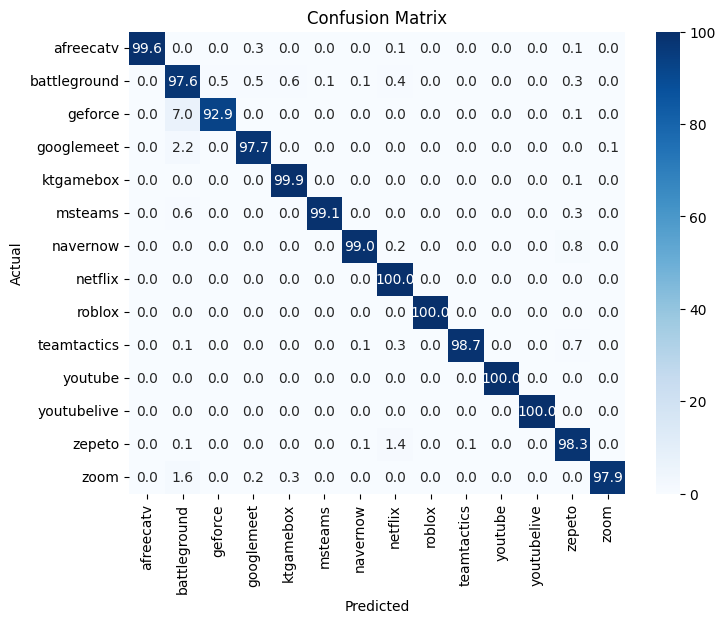

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


val_cm = confusion_matrix(y_test, y_pred, labels=range(14))

# print(f"Validation Loss: {avg_val_loss:.4f}, Accuracy: {val_accuracy:.4f}, F1: {val_f1:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}")

cm_normalized = val_cm.astype('float') / val_cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized * 100, annot=True, fmt=".1f", cmap="Blues", xticklabels=le.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11,12,13]), yticklabels=le.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11,12,13]))

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [18]:
print(le.inverse_transform(range(14)))

['afreecatv' 'battleground' 'geforce' 'googlemeet' 'ktgamebox' 'msteams'
 'navernow' 'netflix' 'roblox' 'teamtactics' 'youtube' 'youtubelive'
 'zepeto' 'zoom']
